# Recurrent Neural Network

### Part 1 - Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

np.set_printoptions(precision=4, suppress=True)
np.set_printoptions(edgeitems=5)
np.core.arrayprint._line_width = 200

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
training_set = dataset_train.iloc[:,1:2].values

In [6]:
training_set

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       [ 328.34],
       [ 322.04],
       ..., 
       [ 790.9 ],
       [ 790.68],
       [ 793.7 ],
       [ 783.33],
       [ 782.75]])

In [7]:
# feature scaling: normalization, 
# whenever build rnn that especially if there is a sigmoid function as activation function 
from sklearn.preprocessing import MinMaxScaler

### feature_range = all our scaled stocked prices will be between 0,1
fit -> get min and max of training set, such that x_norm = (x - min(x))/(max(x) - min(x))

In [8]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a datastructure with 60 timesteps and 1 output 
Timesteps - This is equivalent to the amount of time steps you run your recurrent neural network. 
If you want your network to have memory of 60 characters, this number should be 60. 

**In our case, 60 would correspond ot 60 financial days, where 20 financial days = 1 month. Therefore at each day, we are going to look at the 3 previous months to try to predict the stock price the next day.**

In [9]:
X_train = []
y_train = []

In [10]:
# since we are learning from previous 60 stock prices, our index must start at 60 (learns from 0-59)
for i in range(60,len(training_set)):
    # take 60 previous stock price 
    # [3,0] row, column
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

# convert to np array
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train
y_train

array([[ 0.0858,  0.097 ,  0.0943,  0.0916,  0.0798, ...,  0.0724,  0.0799,  0.0785,  0.0803,  0.085 ],
       [ 0.097 ,  0.0943,  0.0916,  0.0798,  0.0643, ...,  0.0799,  0.0785,  0.0803,  0.085 ,  0.0863],
       [ 0.0943,  0.0916,  0.0798,  0.0643,  0.0585, ...,  0.0785,  0.0803,  0.085 ,  0.0863,  0.0847],
       [ 0.0916,  0.0798,  0.0643,  0.0585,  0.0657, ...,  0.0803,  0.085 ,  0.0863,  0.0847,  0.0745],
       [ 0.0798,  0.0643,  0.0585,  0.0657,  0.0611, ...,  0.085 ,  0.0863,  0.0847,  0.0745,  0.0788],
       ..., 
       [ 0.9344,  0.9249,  0.9211,  0.9244,  0.9305, ...,  0.9697,  0.9508,  0.9629,  0.9612,  0.9548],
       [ 0.9249,  0.9211,  0.9244,  0.9305,  0.9299, ...,  0.9508,  0.9629,  0.9612,  0.9548,  0.952 ],
       [ 0.9211,  0.9244,  0.9305,  0.9299,  0.9311, ...,  0.9629,  0.9612,  0.9548,  0.952 ,  0.9516],
       [ 0.9244,  0.9305,  0.9299,  0.9311,  0.9275, ...,  0.9612,  0.9548,  0.952 ,  0.9516,  0.9573],
       [ 0.9305,  0.9299,  0.9311,  0.9275,  0.9442

array([ 0.0863,  0.0847,  0.0745,  0.0788,  0.0724, ...,  0.952 ,  0.9516,  0.9573,  0.938 ,  0.9369])

### Reshaping currently a 2-D array 
3D tensor with shape (batch_size, timesteps, input_dim)

https://keras.io/layers/recurrent/

In [13]:
# number of predictors aka google stock price
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [23]:
X_train

array([[[ 0.0858],
        [ 0.097 ],
        [ 0.0943],
        [ 0.0916],
        [ 0.0798],
        ..., 
        [ 0.0724],
        [ 0.0799],
        [ 0.0785],
        [ 0.0803],
        [ 0.085 ]],

       [[ 0.097 ],
        [ 0.0943],
        [ 0.0916],
        [ 0.0798],
        [ 0.0643],
        ..., 
        [ 0.0799],
        [ 0.0785],
        [ 0.0803],
        [ 0.085 ],
        [ 0.0863]],

       [[ 0.0943],
        [ 0.0916],
        [ 0.0798],
        [ 0.0643],
        [ 0.0585],
        ..., 
        [ 0.0785],
        [ 0.0803],
        [ 0.085 ],
        [ 0.0863],
        [ 0.0847]],

       [[ 0.0916],
        [ 0.0798],
        [ 0.0643],
        [ 0.0585],
        [ 0.0657],
        ..., 
        [ 0.0803],
        [ 0.085 ],
        [ 0.0863],
        [ 0.0847],
        [ 0.0745]],

       [[ 0.0798],
        [ 0.0643],
        [ 0.0585],
        [ 0.0657],
        [ 0.0611],
        ..., 
        [ 0.085 ],
        [ 0.0863],
        [ 0.0847],
        [ 

### Part 2 - Building the RNN 

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [27]:
# sequence of layers 
# regressor to predict continuous outputs/values (stock prices)
regressor = Sequential()

### Add first LSTM and Dropout regularization to prevent overfitting

In [28]:
# Arguments
# units = # of neurons to use 
# return sequence = True, because you want to add more layers
# input shape only need (X_train.shape[1],1), because it will take X_train.shape[0] automatically
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
# specify percentage of neurons you want to ignore in layers 
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularization

In [29]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularization

In [30]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM and some Dropout regularization

In [31]:
# false because we are not returning any more sequences
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [32]:
# number of neurons there should be in output layer 
regressor.add(Dense(units=1))

### Compiling the RNN 

In [33]:
# usually either rmsprop or adam 
# mean squared error for regression 
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [34]:
# fitting the rnn to training set
# experiment with # of epochs in real life use cases
regressor.fit(X_train, y_train, epochs = 100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0603
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0077
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0055
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045A: 1s - loss:
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0049
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 7s 

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016


### Part 3 - Making predictions and visualising the results

In [36]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [37]:
real_stock_price

array([[ 778.81],
       [ 788.36],
       [ 786.08],
       [ 795.26],
       [ 806.4 ],
       [ 807.86],
       [ 805.  ],
       [ 807.14],
       [ 807.48],
       [ 807.08],
       [ 805.81],
       [ 805.12],
       [ 806.91],
       [ 807.25],
       [ 822.3 ],
       [ 829.62],
       [ 837.81],
       [ 834.71],
       [ 814.66],
       [ 796.86]])

In [44]:
# Getting predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# total - 20 financial days - 60 financial days 
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [48]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

# convert to np array
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [50]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price

array([[ 0.9654],
       [ 0.9603],
       [ 0.9593],
       [ 0.9613],
       [ 0.9671],
       [ 0.9777],
       [ 0.9887],
       [ 0.9949],
       [ 0.9965],
       [ 0.9957],
       [ 0.9944],
       [ 0.9932],
       [ 0.9926],
       [ 0.9933],
       [ 0.9952],
       [ 1.0027],
       [ 1.0152],
       [ 1.0297],
       [ 1.0395],
       [ 1.0355]], dtype=float32)

In [51]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[ 798.0836],
       [ 795.3278],
       [ 794.7913],
       [ 795.8552],
       [ 798.9984],
       [ 804.7034],
       [ 810.6289],
       [ 813.9298],
       [ 814.7996],
       [ 814.3865],
       [ 813.6702],
       [ 813.0429],
       [ 812.6898],
       [ 813.0901],
       [ 814.0815],
       [ 818.1299],
       [ 824.8377],
       [ 832.6548],
       [ 837.9369],
       [ 835.7576]], dtype=float32)

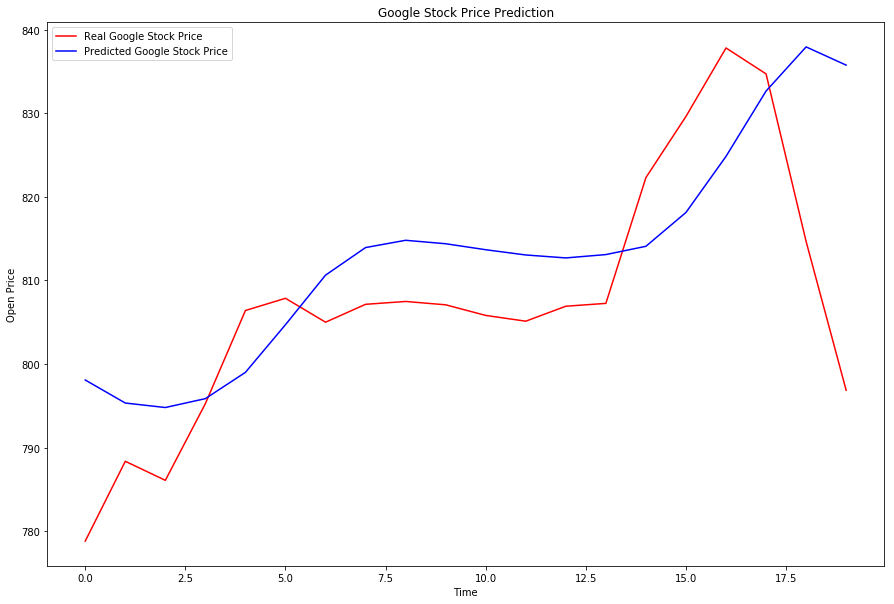

In [57]:
# Visualizing the results
plt.figure(figsize=(15,10))
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.show();

### Evaluate, Tune, and Improve RNN

In [58]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV

In [66]:
def build_regressor(optimizer):
    regressor = Sequential()
    # first
    regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
    regressor.add(Dropout(0.2))
    # second
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    # third
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    # fourth
    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))
    # output
    regressor.add(Dense(units=1))
    # compile
    regressor.compile(optimizer=optimizer,loss='mean_squared_error')
    return regressor

In [67]:
# wrap the whole regressor
# new classifier built on k-fold cross validation
# gs grid search
gs_fold_regressor = KerasRegressor(build_fn = build_regressor)
parameters = {'batch_size': [25, 32], 
              'epochs': [100],
              'optimizer':['adam','rmsprop']}

grid_search = GridSearchCV(estimator = gs_fold_regressor, 
                           param_grid = parameters, 
                           scoring = 'neg_mean_squared_error', 
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)

Epoch 1/100
1078/1078 [==============================] - 9s 9ms/step - loss: 0.0518
Epoch 2/100
1078/1078 [==============================] - 7s 6ms/step - loss: 0.0065
Epoch 3/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0053
Epoch 4/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0050
Epoch 5/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0053
Epoch 6/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0056
Epoch 7/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0057
Epoch 8/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0049
Epoch 9/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0049A: 2s 
Epoch 10/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0046
Epoch 11/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0046
Epoch 12/100
1078/1078 [==============================] - 8s 7ms/ste

1078/1078 [==============================] - 8s 8ms/step - loss: 0.0014
Epoch 98/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0014
Epoch 99/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0013
Epoch 100/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0012
Epoch 1/100
1078/1078 [==============================] - 11s 11ms/step - loss: 0.0581
Epoch 2/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0065A: 0s - loss: 0
Epoch 3/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0067
Epoch 4/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0057
Epoch 5/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0056
Epoch 6/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0066
Epoch 7/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0048
Epoch 8/100
1078/1078 [==============================] - 8s 7ms/ste

1078/1078 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 94/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0017
Epoch 95/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 96/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 97/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 98/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 99/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 100/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 1/100
1078/1078 [==============================] - 11s 10ms/step - loss: 0.0458
Epoch 2/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0059
Epoch 3/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0065
Epoch 4/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0

1078/1078 [==============================] - 8s 7ms/step - loss: 0.0017
Epoch 90/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 91/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 92/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 93/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0017
Epoch 94/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 95/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0018
Epoch 96/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 97/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 98/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 99/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 100/100
1078/1078 [==============================] - 8s 7ms/step - loss:

1078/1078 [==============================] - 8s 7ms/step - loss: 0.0018
Epoch 86/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0019
Epoch 87/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0017
Epoch 88/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0017
Epoch 89/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 90/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0015
Epoch 91/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0016
Epoch 92/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0015
Epoch 93/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0017
Epoch 94/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0017
Epoch 95/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 96/100
1078/1078 [==============================] - 7s 7ms/step - loss: 

1078/1078 [==============================] - 7s 7ms/step - loss: 0.0015
Epoch 82/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0019
Epoch 83/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0016
Epoch 84/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0023
Epoch 85/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0018
Epoch 86/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0019
Epoch 87/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0018
Epoch 88/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0018
Epoch 89/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0016
Epoch 90/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 91/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0014
Epoch 92/100
1078/1078 [==============================] - 7s 7ms/step - loss: 

1078/1078 [==============================] - 8s 7ms/step - loss: 0.0018
Epoch 78/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0020
Epoch 79/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0018
Epoch 80/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0017
Epoch 81/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 82/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0017
Epoch 83/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0017
Epoch 84/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0018
Epoch 85/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 86/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0019
Epoch 87/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 88/100
1078/1078 [==============================] - 8s 7ms/step - loss: 

1078/1078 [==============================] - 8s 8ms/step - loss: 0.0018
Epoch 73/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0019
Epoch 74/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0017
Epoch 75/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0018
Epoch 76/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0018
Epoch 77/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0015
Epoch 78/100
1078/1078 [==============================] - 9s 9ms/step - loss: 0.0016
Epoch 79/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0018: 0s - loss: 0.001
Epoch 80/100
1078/1078 [==============================] - 9s 9ms/step - loss: 0.0017
Epoch 81/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0017
Epoch 82/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0016
Epoch 83/100
1078/1078 [==============================] -

1078/1078 [==============================] - 10s 9ms/step - loss: 0.0021
Epoch 66/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0020
Epoch 67/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0020
Epoch 68/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0015
Epoch 69/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0014
Epoch 70/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0015
Epoch 71/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0015
Epoch 72/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0016
Epoch 73/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0015
Epoch 74/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0016
Epoch 75/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0015
Epoch 76/100
1078/1078 [==============================] - 10s 9ms/s

1079/1079 [==============================] - 10s 9ms/step - loss: 0.0017
Epoch 61/100
1079/1079 [==============================] - 10s 9ms/step - loss: 0.0018
Epoch 62/100
1079/1079 [==============================] - 10s 9ms/step - loss: 0.0018
Epoch 63/100
1079/1079 [==============================] - 9s 9ms/step - loss: 0.0017
Epoch 64/100
1079/1079 [==============================] - 9s 9ms/step - loss: 0.0019
Epoch 65/100
1079/1079 [==============================] - 9s 9ms/step - loss: 0.0017
Epoch 66/100
1079/1079 [==============================] - 9s 9ms/step - loss: 0.0016
Epoch 67/100
1079/1079 [==============================] - 9s 9ms/step - loss: 0.0015
Epoch 68/100
1079/1079 [==============================] - 9s 9ms/step - loss: 0.0019A: 2s
Epoch 69/100
1079/1079 [==============================] - 9s 9ms/step - loss: 0.0017
Epoch 70/100
1079/1079 [==============================] - 10s 9ms/step - loss: 0.0017
Epoch 71/100
1079/1079 [==============================] - 9s 9ms/step

Epoch 56/100
1079/1079 [==============================] - 8s 7ms/step - loss: 0.0018
Epoch 57/100
1079/1079 [==============================] - 8s 7ms/step - loss: 0.0017
Epoch 58/100
1079/1079 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 59/100
1079/1079 [==============================] - 8s 7ms/step - loss: 0.0018
Epoch 60/100
1079/1079 [==============================] - 8s 8ms/step - loss: 0.0015
Epoch 61/100
1079/1079 [==============================] - 8s 7ms/step - loss: 0.0014
Epoch 62/100
1079/1079 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 63/100
1079/1079 [==============================] - 8s 7ms/step - loss: 0.0018
Epoch 64/100
1079/1079 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 65/100
1079/1079 [==============================] - 8s 7ms/step - loss: 0.0017
Epoch 66/100
1079/1079 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 67/100
1079/1079 [==============================] - 8s 7ms/

1078/1078 [==============================] - 9s 8ms/step - loss: 0.0021
Epoch 52/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0025
Epoch 53/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0021
Epoch 54/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0020
Epoch 55/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0022A: 1s - loss: - ETA: 0s - loss: 0.00
Epoch 56/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0020
Epoch 57/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0020
Epoch 58/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0023
Epoch 59/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0022
Epoch 60/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0020A: 6s - los
Epoch 61/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0018
Epoch 62/100
1078/1078 [=======

1078/1078 [==============================] - 8s 8ms/step - loss: 0.0026
Epoch 45/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0026A: 0s - loss: 0.
Epoch 46/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0027
Epoch 47/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0022A: 2s - 
Epoch 48/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0027
Epoch 49/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0025
Epoch 50/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0022A: 2s - l
Epoch 51/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0025
Epoch 52/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0024
Epoch 53/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0022A: 1s - loss:
Epoch 54/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0024
Epoch 55/100
1078/1078 [========

1078/1078 [==============================] - 10s 9ms/step - loss: 0.0028
Epoch 40/100
1078/1078 [==============================] - 10s 10ms/step - loss: 0.0027
Epoch 41/100
1078/1078 [==============================] - 11s 10ms/step - loss: 0.0029
Epoch 42/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0028
Epoch 43/100
1078/1078 [==============================] - 10s 10ms/step - loss: 0.0024
Epoch 44/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0028
Epoch 45/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0027
Epoch 46/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0027
Epoch 47/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0027
Epoch 48/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0022
Epoch 49/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0022
Epoch 50/100
1078/1078 [==============================] - 10s 9m

1078/1078 [==============================] - 8s 7ms/step - loss: 0.0031
Epoch 35/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0031
Epoch 36/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0030
Epoch 37/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0029
Epoch 38/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0032
Epoch 39/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0030
Epoch 40/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0031
Epoch 41/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0027
Epoch 42/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0028
Epoch 43/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0026
Epoch 44/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0026
Epoch 45/100
1078/1078 [==============================] - 8s 7ms/step - loss: 

1078/1078 [==============================] - 8s 7ms/step - loss: 0.0028
Epoch 30/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0034
Epoch 31/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0032
Epoch 32/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0029
Epoch 33/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0030
Epoch 34/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0028
Epoch 35/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0032
Epoch 36/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0030
Epoch 37/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0028
Epoch 38/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0028
Epoch 39/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0031
Epoch 40/100
1078/1078 [==============================] - 8s 7ms/step - loss: 

Epoch 25/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0037
Epoch 26/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0032
Epoch 27/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0033
Epoch 28/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0033
Epoch 29/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0031
Epoch 30/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0031
Epoch 31/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0030
Epoch 32/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0030
Epoch 33/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0030
Epoch 34/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0029
Epoch 35/100
1078/1078 [==============================] - 7s 7ms/step - loss: 0.0030
Epoch 36/100
1078/1078 [==============================] - 7s 7ms/

Epoch 21/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0038
Epoch 22/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0036
Epoch 23/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0037
Epoch 24/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0039
Epoch 25/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0037
Epoch 26/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0034
Epoch 27/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0033
Epoch 28/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0034
Epoch 29/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0034
Epoch 30/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0031
Epoch 31/100
1078/1078 [==============================] - 9s 8ms/step - loss: 0.0034
Epoch 32/100
1078/1078 [==============================] - 9s 8ms/

1078/1078 [==============================] - 10s 9ms/step - loss: 0.0045
Epoch 17/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0039
Epoch 18/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0041
Epoch 19/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0044
Epoch 20/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0040
Epoch 21/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0038
Epoch 22/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0036
Epoch 23/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0032
Epoch 24/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0033
Epoch 25/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0032
Epoch 26/100
1078/1078 [==============================] - 10s 9ms/step - loss: 0.0034
Epoch 27/100
1078/1078 [==============================] - 9s 8ms/st

1079/1079 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 13/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 14/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 15/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 16/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0041
Epoch 17/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0038
Epoch 18/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 19/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0038
Epoch 20/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0032
Epoch 21/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0035
Epoch 22/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0038
Epoch 23/100
1079/1079 [==============================] - 7s 6ms/step - loss: 

1079/1079 [==============================] - 7s 7ms/step - loss: 0.0061
Epoch 9/100
1079/1079 [==============================] - 7s 7ms/step - loss: 0.0055
Epoch 10/100
1079/1079 [==============================] - 7s 7ms/step - loss: 0.0047
Epoch 11/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 12/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 13/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0045
Epoch 14/100
1079/1079 [==============================] - 7s 7ms/step - loss: 0.0040
Epoch 15/100
1079/1079 [==============================] - 7s 7ms/step - loss: 0.0040
Epoch 16/100
1079/1079 [==============================] - 7s 7ms/step - loss: 0.0036
Epoch 17/100
1079/1079 [==============================] - 7s 7ms/step - loss: 0.0033
Epoch 18/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0038
Epoch 19/100
1079/1079 [==============================] - 7s 7ms/step - loss: 0

1078/1078 [==============================] - 6s 5ms/step - loss: 0.0062
Epoch 5/100
1078/1078 [==============================] - 5s 5ms/step - loss: 0.0058
Epoch 6/100
1078/1078 [==============================] - 5s 5ms/step - loss: 0.0060
Epoch 7/100
1078/1078 [==============================] - 5s 5ms/step - loss: 0.0060
Epoch 8/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 9/100
1078/1078 [==============================] - 5s 5ms/step - loss: 0.0046
Epoch 10/100
1078/1078 [==============================] - 5s 5ms/step - loss: 0.0048
Epoch 11/100
1078/1078 [==============================] - 5s 5ms/step - loss: 0.0048
Epoch 12/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 13/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 14/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 15/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.004

1078/1078 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 1/100
1078/1078 [==============================] - 14s 13ms/step - loss: 0.0602
Epoch 2/100
1078/1078 [==============================] - 5s 5ms/step - loss: 0.0078
Epoch 3/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0066
Epoch 4/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 5/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 6/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 7/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 8/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 9/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 10/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 11/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0051


1078/1078 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 97/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 98/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 99/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 100/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 1/100
1078/1078 [==============================] - 14s 13ms/step - loss: 0.0655
Epoch 2/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0086
Epoch 3/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0063
Epoch 4/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0057
Epoch 5/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 6/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 7/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.00

1078/1078 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 93/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 94/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0021
Epoch 95/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 96/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 97/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 98/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 99/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 100/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 1/100
1078/1078 [==============================] - 14s 13ms/step - loss: 0.0741
Epoch 2/100
1078/1078 [==============================] - 5s 5ms/step - loss: 0.0075
Epoch 3/100
1078/1078 [==============================] - 6s 5ms/step - loss: 

1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 89/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 90/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 91/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 92/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 93/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 94/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 95/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 96/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 97/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 98/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 99/100
1078/1078 [==============================] - 6s 5ms/step - loss: 

1078/1078 [==============================] - 5s 5ms/step - loss: 0.0018
Epoch 85/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0019
Epoch 86/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0020
Epoch 87/100
1078/1078 [==============================] - 8s 7ms/step - loss: 0.0021
Epoch 88/100
1078/1078 [==============================] - 11s 10ms/step - loss: 0.0020
Epoch 89/100
1078/1078 [==============================] - 5s 5ms/step - loss: 0.0017
Epoch 90/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0017
Epoch 91/100
1078/1078 [==============================] - 8s 8ms/step - loss: 0.0021
Epoch 92/100
1078/1078 [==============================] - 10s 10ms/step - loss: 0.0017
Epoch 93/100
1078/1078 [==============================] - 5s 5ms/step - loss: 0.0018
Epoch 94/100
1078/1078 [==============================] - 9s 9ms/step - loss: 0.0017
Epoch 95/100
1078/1078 [==============================] - 11s 10ms/step - 

1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 80/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 81/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0018
Epoch 82/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 83/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 84/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 85/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 86/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 87/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 88/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 89/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 90/100
1078/1078 [==============================] - 6s 5ms/step - loss: 

1078/1078 [==============================] - 6s 6ms/step - loss: 0.0018
Epoch 76/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0017A: 2
Epoch 77/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0021
Epoch 78/100
1078/1078 [==============================] - 7s 6ms/step - loss: 0.0019
Epoch 79/100
1078/1078 [==============================] - 7s 6ms/step - loss: 0.0017A: 3
Epoch 80/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0016
Epoch 81/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0018
Epoch 82/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0017
Epoch 83/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0017
Epoch 84/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0018
Epoch 85/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0018
Epoch 86/100
1078/1078 [==============================] - 6s 6ms/step 

1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 72/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 73/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 74/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 75/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 76/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 77/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0020
Epoch 78/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0020
Epoch 79/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 80/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 81/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 82/100
1078/1078 [==============================] - 6s 5ms/step - loss: 

1079/1079 [==============================] - 5s 5ms/step - loss: 0.0018
Epoch 68/100
1079/1079 [==============================] - 5s 5ms/step - loss: 0.0018
Epoch 69/100
1079/1079 [==============================] - 5s 5ms/step - loss: 0.0018
Epoch 70/100
1079/1079 [==============================] - 5s 5ms/step - loss: 0.0016
Epoch 71/100
1079/1079 [==============================] - 5s 5ms/step - loss: 0.0020
Epoch 72/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0017A
Epoch 73/100
1079/1079 [==============================] - 6s 6ms/step - loss: 0.0018
Epoch 74/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 75/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0020
Epoch 76/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 77/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 78/100
1079/1079 [==============================] - 6s 5ms/step - loss:

1079/1079 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 64/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0021
Epoch 65/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0020
Epoch 66/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 67/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 68/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 69/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 70/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 71/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 72/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 73/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0017A: 2s -
Epoch 74/100
1079/1079 [==============================] - 6s 6ms/step -

1078/1078 [==============================] - 6s 6ms/step - loss: 0.0024
Epoch 60/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0024
Epoch 61/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0021
Epoch 62/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0022
Epoch 63/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0021
Epoch 64/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0024
Epoch 65/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0022
Epoch 66/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0020
Epoch 67/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0021
Epoch 68/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0020
Epoch 69/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0021
Epoch 70/100
1078/1078 [==============================] - 6s 6ms/step - loss: 

1078/1078 [==============================] - 6s 5ms/step - loss: 0.0023
Epoch 56/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0026
Epoch 57/100
1078/1078 [==============================] - 7s 6ms/step - loss: 0.0023
Epoch 58/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0023
Epoch 59/100
1078/1078 [==============================] - 7s 6ms/step - loss: 0.0026
Epoch 60/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0024
Epoch 61/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0020A: 0s - loss: 0
Epoch 62/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0026
Epoch 63/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0022
Epoch 64/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0022
Epoch 65/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0021
Epoch 66/100
1078/1078 [==============================] - 6s 6m

Epoch 51/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0029
Epoch 52/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0024
Epoch 53/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0027
Epoch 54/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0027
Epoch 55/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0027
Epoch 56/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0025
Epoch 57/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0025
Epoch 58/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0026
Epoch 59/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0025
Epoch 60/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0024
Epoch 61/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0021
Epoch 62/100
1078/1078 [==============================] - 6s 5ms/

1078/1078 [==============================] - 6s 5ms/step - loss: 0.0030
Epoch 48/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0032
Epoch 49/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0028
Epoch 50/100
1078/1078 [==============================] - 7s 6ms/step - loss: 0.0026
Epoch 51/100
1078/1078 [==============================] - 7s 6ms/step - loss: 0.0030
Epoch 52/100
1078/1078 [==============================] - 7s 6ms/step - loss: 0.0025
Epoch 53/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0028
Epoch 54/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0026
Epoch 55/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0025
Epoch 56/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0026
Epoch 57/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0024
Epoch 58/100
1078/1078 [==============================] - 6s 5ms/step - loss: 

1078/1078 [==============================] - 6s 6ms/step - loss: 0.0030
Epoch 43/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0028
Epoch 44/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0028
Epoch 45/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0028
Epoch 46/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0027
Epoch 47/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0027
Epoch 48/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0026
Epoch 49/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0029
Epoch 50/100
1078/1078 [==============================] - 7s 6ms/step - loss: 0.0026A: 2s
Epoch 51/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0027
Epoch 52/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0029
Epoch 53/100
1078/1078 [==============================] - 6s 6ms/step - l

1078/1078 [==============================] - 6s 6ms/step - loss: 0.0031
Epoch 39/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0034
Epoch 40/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0033A: 0s - loss: 0.003
Epoch 41/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0029
Epoch 42/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0031
Epoch 43/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 44/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0029
Epoch 45/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0027
Epoch 46/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0030
Epoch 47/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0022
Epoch 48/100
1078/1078 [==============================] - 7s 6ms/step - loss: 0.0028
Epoch 49/100
1078/1078 [==============================] - 6

1078/1078 [==============================] - 6s 5ms/step - loss: 0.0032
Epoch 35/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 36/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 37/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0027
Epoch 38/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0030
Epoch 39/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0032
Epoch 40/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0029
Epoch 41/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0032
Epoch 42/100
1078/1078 [==============================] - 7s 6ms/step - loss: 0.0026
Epoch 43/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0030
Epoch 44/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0030
Epoch 45/100
1078/1078 [==============================] - 6s 6ms/step - loss: 

1078/1078 [==============================] - 6s 5ms/step - loss: 0.0032
Epoch 30/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0036
Epoch 31/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0031
Epoch 32/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0033
Epoch 33/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0032
Epoch 34/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0031
Epoch 35/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0029
Epoch 36/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0029
Epoch 37/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0030
Epoch 38/100
1078/1078 [==============================] - 6s 6ms/step - loss: 0.0026A: 2s - 
Epoch 39/100
1078/1078 [==============================] - 6s 5ms/step - loss: 0.0029
Epoch 40/100
1078/1078 [==============================] - 6s 5ms/step 

1079/1079 [==============================] - 6s 6ms/step - loss: 0.0035
Epoch 26/100
1079/1079 [==============================] - 6s 6ms/step - loss: 0.0032
Epoch 27/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0035
Epoch 28/100
1079/1079 [==============================] - 6s 6ms/step - loss: 0.0031
Epoch 29/100
1079/1079 [==============================] - 6s 6ms/step - loss: 0.0037
Epoch 30/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0029
Epoch 31/100
1079/1079 [==============================] - 6s 6ms/step - loss: 0.0033
Epoch 32/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0031
Epoch 33/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 34/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0026
Epoch 35/100
1079/1079 [==============================] - 6s 5ms/step - loss: 0.0029
Epoch 36/100
1079/1079 [==============================] - 6s 5ms/step - loss: 

1079/1079 [==============================] - 6s 6ms/step - loss: 0.0036
Epoch 22/100
1079/1079 [==============================] - 6s 6ms/step - loss: 0.0036
Epoch 23/100
1079/1079 [==============================] - 6s 6ms/step - loss: 0.0036
Epoch 24/100
1079/1079 [==============================] - 6s 6ms/step - loss: 0.0036
Epoch 25/100
1079/1079 [==============================] - 6s 6ms/step - loss: 0.0033
Epoch 26/100
1079/1079 [==============================] - 6s 6ms/step - loss: 0.0035
Epoch 27/100
1079/1079 [==============================] - 6s 6ms/step - loss: 0.0032
Epoch 28/100
1079/1079 [==============================] - 6s 6ms/step - loss: 0.0034
Epoch 29/100
1079/1079 [==============================] - 7s 6ms/step - loss: 0.0031
Epoch 30/100
1079/1079 [==============================] - 6s 6ms/step - loss: 0.0028
Epoch 31/100
1079/1079 [==============================] - 6s 6ms/step - loss: 0.0030
Epoch 32/100
1079/1079 [==============================] - 6s 6ms/step - loss: 

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0040A: 0s - loss: 0.
Epoch 17/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0039
Epoch 18/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0038
Epoch 19/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0036
Epoch 20/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0038
Epoch 21/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0034
Epoch 22/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0034
Epoch 23/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0032
Epoch 24/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 25/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 26/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0037
Epoch 27/100
1198/1198 [==============================] - 7s 6

In [68]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_parameters
best_accuracy

{'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}

-0.0007192091375528458

In [69]:
# now that we know which parameters provide the least squared error 
# fit your rnn with these parameters 
# then plot 